<a href="https://colab.research.google.com/github/clementsiegrist/owkin_challenge/blob/master/Fuzzy_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
pip install torch torchvision tensorflow keras anfis pyfuzzylite scikit-fuzzy numpy pandas matplotlib opencv-python pillow fuzzy-c-means

In [1]:
!git clone https://github.com/clementsiegrist/reco_formes.git

Cloning into 'reco_formes'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [66]:
import torch
import torchvision
import tensorflow as tf
import keras 
import anfis 
import fuzzylite as fl
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

**I. Brief vizualization of fuzzy membership function**

Introducing scikit-fuzzy library, visualizing a simple Fuzzy OR rule based on two triangular membership functions.

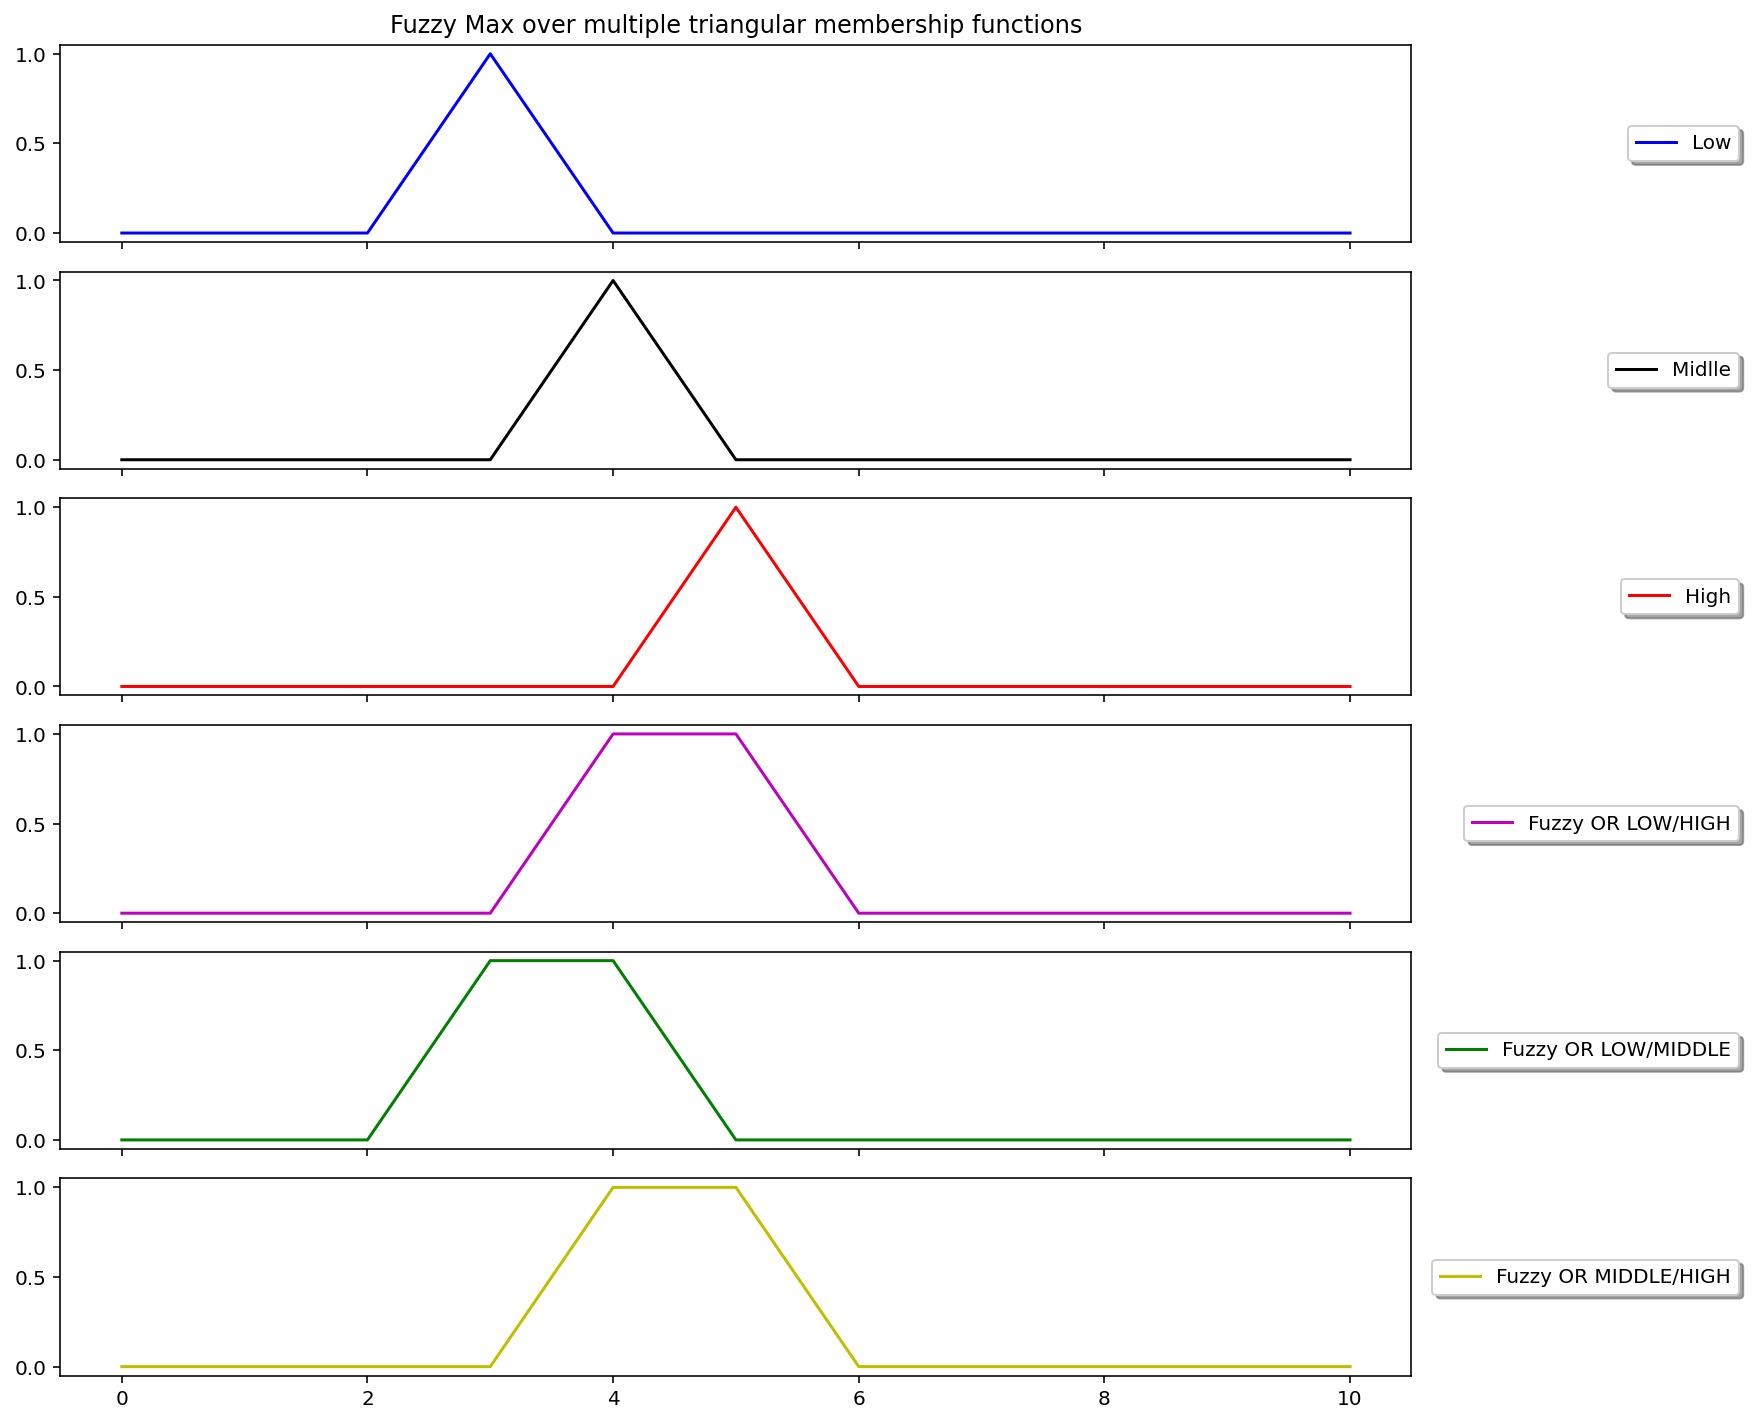

In [19]:
# Defining numpy array
x_qual = np.arange(0, 11, 1)

# Defining the numpy array for Traingular membership functions
qual_lo = fuzz.trimf(x_qual, [2, 3, 4])
qual_md = fuzz.trimf(x_qual, [3, 4, 5])
qual_hi = fuzz.trimf(x_qual, [4, 5, 6])
max = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_hi)
max1 = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_md)
max2 = max = fuzz.fuzzy_or(x_qual, qual_md, x_qual, qual_hi)

# Plot the results
fig, ax = plt.subplots(6, 1, figsize=(10,10), sharex=True, sharey=True)
ax[0].plot(x_qual, qual_lo, 'b', label='Low')
ax[1].plot(x_qual, qual_md, 'k', label='Midlle')
ax[2].plot(x_qual, qual_hi, 'r', label='High')
ax[3].plot(max[0], max[1], 'm', label='Fuzzy OR LOW/HIGH')
ax[4].plot(max1[0], max1[1], 'g', label='Fuzzy OR LOW/MIDDLE')
ax[5].plot(max2[0], max2[1], 'y', label='Fuzzy OR MIDDLE/HIGH')
ax[0].set_title('Fuzzy Max over multiple triangular membership functions')
plt.tight_layout()
ax[0].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[1].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[2].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[3].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[4].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[5].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
fig.show()

# **II. Fuzzy-Cmeans**

**II. A Fuzzy-Cmeans on a greyscale image**



In [50]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from reco_formes.clustering import cmeans
import matplotlib as mlp

In [53]:
def change_color_fuzzycmeans(cluster_membership, clusters):

    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img


def read_image(path):

    folder = path
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        img = cv2.imread(os.path.join(folder, i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 1))
        list_img.append(rgb_img)

    return list_img, img.shape

def fuzzy_cmeansgrey(path, n_clusters):
    '''
    
    :param path:
    :param num_clusters:
    :return:
    '''

    # looping every images
    list_img, shape = read_image(path)
    n_data = len(list_img)
    clusters = n_clusters
    for index, rgb_img in enumerate(list_img):

        # looping every cluster
        
        for i, num_cluster in enumerate(clusters):
            print('-----------------------------------------------------------')
            print('         Image ' + str(i + 1) + '          Nb Clusters :' +' '+ str(num_cluster))
            cntr, u, u0, d, jm, p, fpc = cmeans(
                rgb_img.T, num_cluster, 2, error=0.05, maxiter=10000, init=None, seed=42)

            new_img = change_color_fuzzycmeans(u, cntr)
            new_img = np.reshape(new_img, shape).astype(np.uint8)
            # Create plot
            fig, axs = plt.subplots(1, 2, figsize=(5, 5))
            axs[0].imshow(np.reshape(rgb_img, shape), cmap='gray')
            axs[1].imshow(new_img, cmap='gray')
            plt.tight_layout()
            plt.show()



-----------------------------------------------------------
         Image 1          Nb Clusters : 2


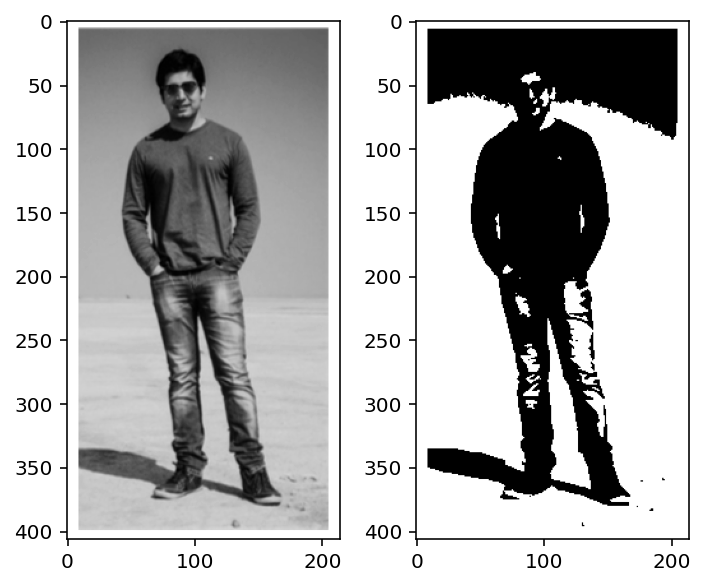

-----------------------------------------------------------
         Image 1          Nb Clusters : 4


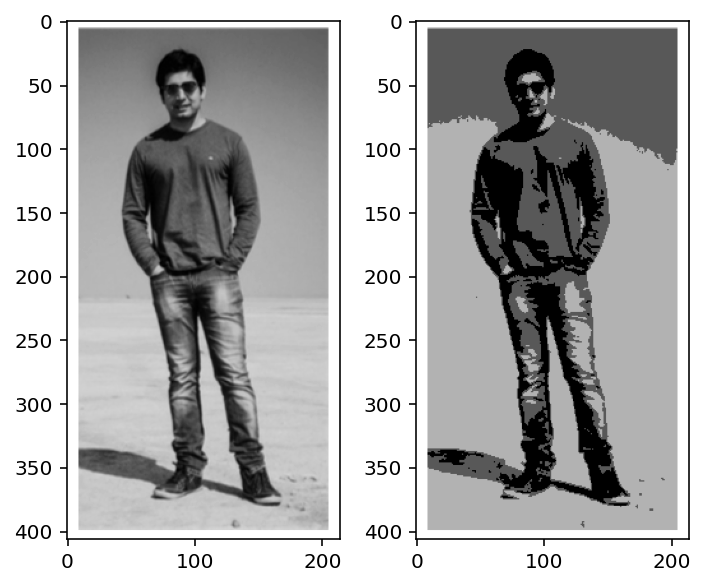

-----------------------------------------------------------
         Image 1          Nb Clusters : 6


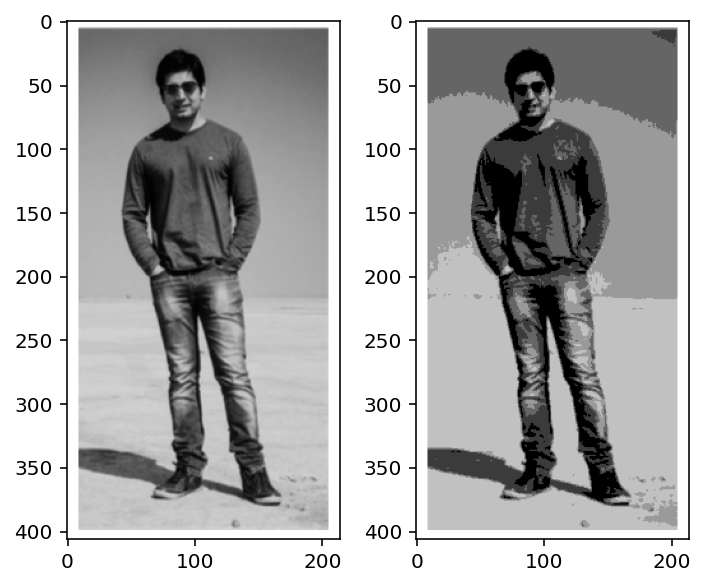

-----------------------------------------------------------
         Image 1          Nb Clusters : 8


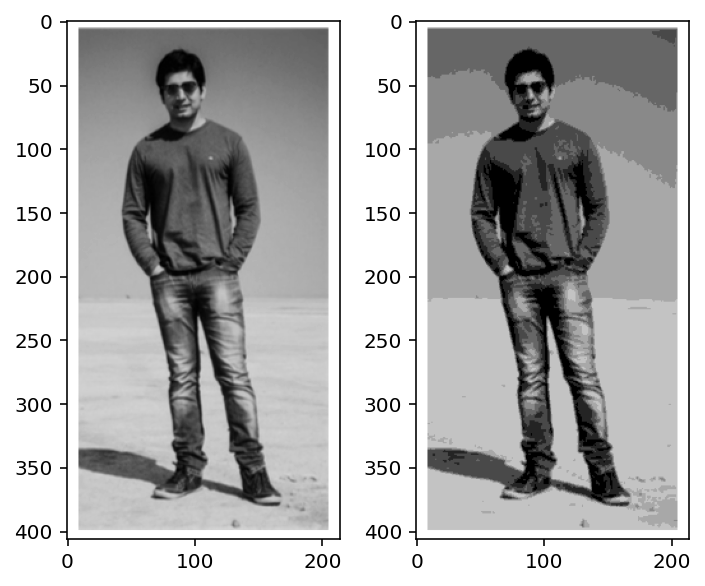

-----------------------------------------------------------
         Image 1          Nb Clusters : 10


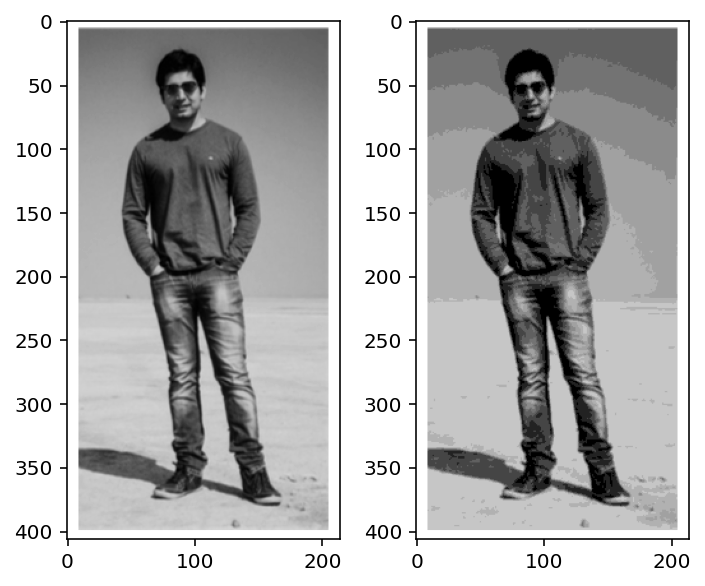

-----------------------------------------------------------
         Image 1          Nb Clusters : 12


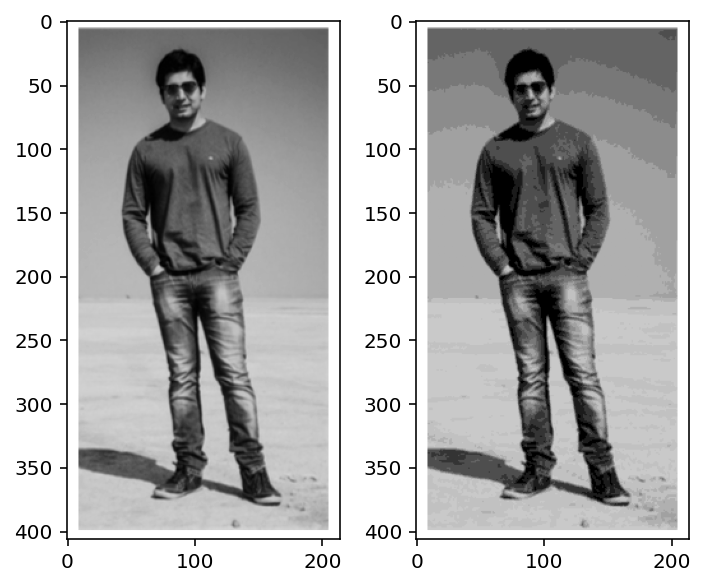

In [54]:
fuzzy_cmeansgrey('/content/shape_dir', [2, 4, 6, 8, 10, 12])

**II. B Fuzzy-Cmeans on a RGB image**

['Capture d’écran 2020-10-31 à 21.18.49.png']
-----------------------------------------------------------
         Image 1          Nb Clusters : 2


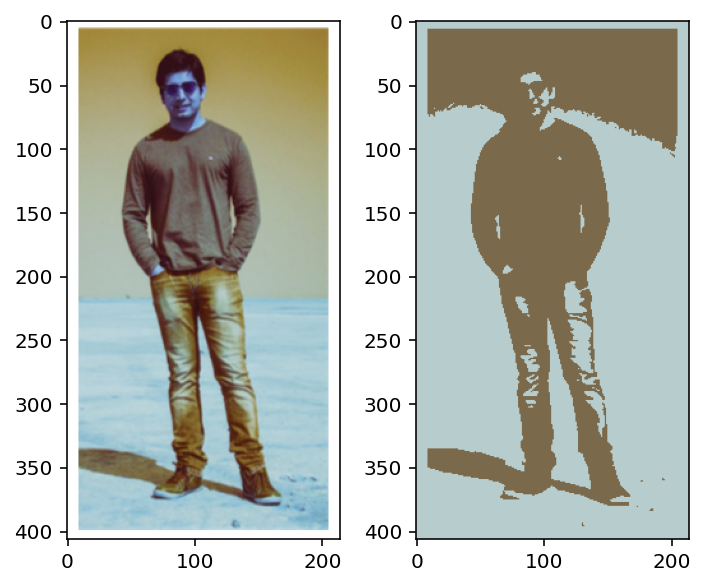

-----------------------------------------------------------
         Image 1          Nb Clusters : 4


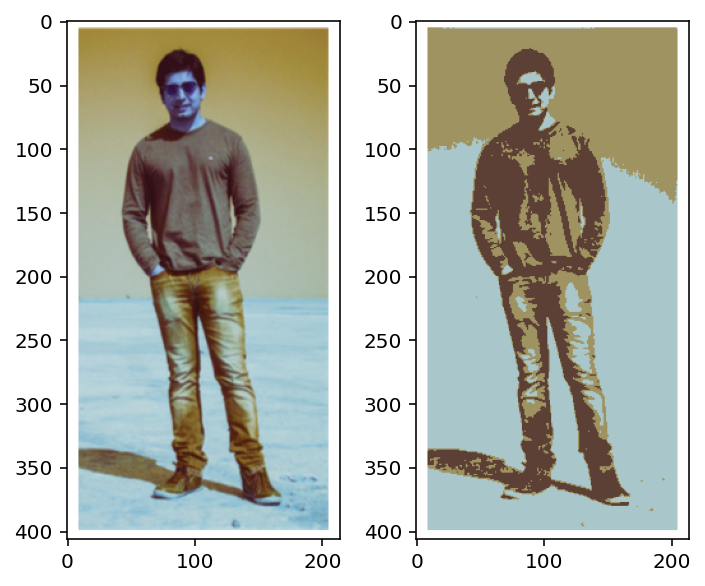

-----------------------------------------------------------
         Image 1          Nb Clusters : 6


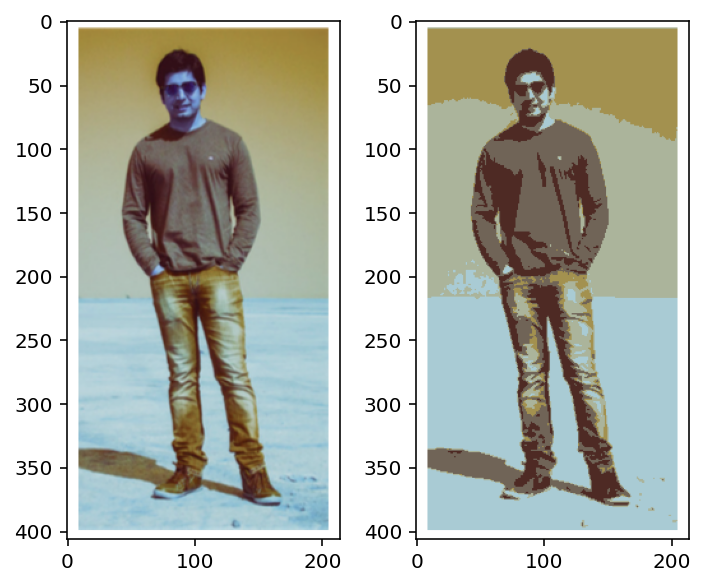

-----------------------------------------------------------
         Image 1          Nb Clusters : 8


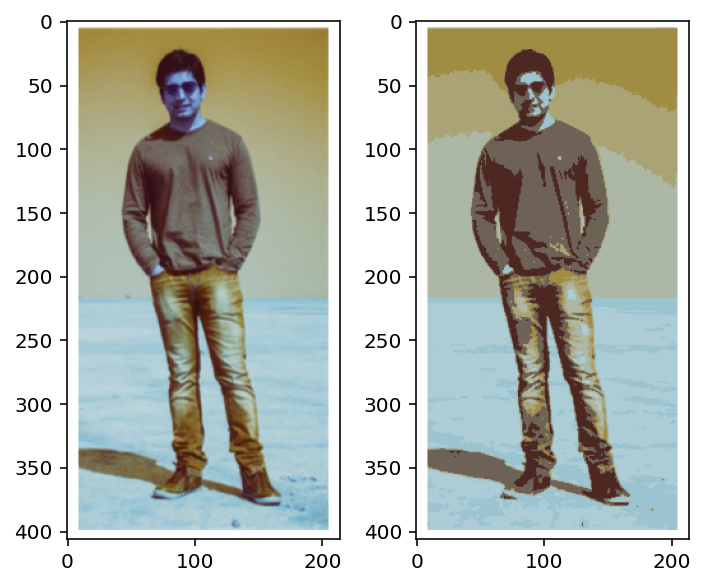

In [9]:
def readimage_3D(path):

    folder = path
    list_images = os.listdir(folder)
    print(list_images)
    list_img = []
    for i in list_images:
        img = cv2.imread(os.path.join(folder, i))
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)

    return list_img, img.shape

def pipeline(path, n_clusters):

    list_img, shape = readimage_3D(path)
    n_data = len(list_img)
    num_clusters = n_clusters

    # Iterates over previously loaded images
    for index, rgb_img in enumerate(list_img):
        img = np.reshape(rgb_img, shape).astype(np.uint8)

        # Iterate over each cluster
        for i, num_clusters in enumerate(num_clusters):
            print('-----------------------------------------------------------')
            print('         Image ' + str(index + 1) + '          Nb Clusters :' +' '+ str(num_clusters))
            centers, u_fonc, u_fonc0, distance, hist, num_iter, fuzzy_part_coeff = cmeans(
                rgb_img.T, num_clusters, 2, error=0.05, maxiter=10000, init=None, seed=42)

            # Change each pixel color according
            new_img = change_color_fuzzycmeans(u_fonc, centers)
            new_img = np.reshape(new_img,shape).astype(np.uint8)

            # Create plot
            fig, axs = plt.subplots(1, 2, figsize=(5, 5))
            axs[0].imshow(np.reshape(rgb_img, shape))
            axs[1].imshow(new_img, cmap='gray')
            plt.tight_layout()
            plt.show()

pipeline('/content/shape_dir', [2, 4, 6, 8, 10, 12])

# **III. ANFIS : Adaptative Neuro-Fuzzy Inference Systems**


Create an ANFIS networks as proposed by J.-S. R. Jang with the modified anfis library and applied it on predicting a sort of sync function convolved.multipled with a non-uniform triangular function. 

In the the original publication [1]

J.-S. R. Jang (1992) ANFIS : Adaptative Neuro-Fuzzy Systems.

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
0.144028
0.017168
-0.001662


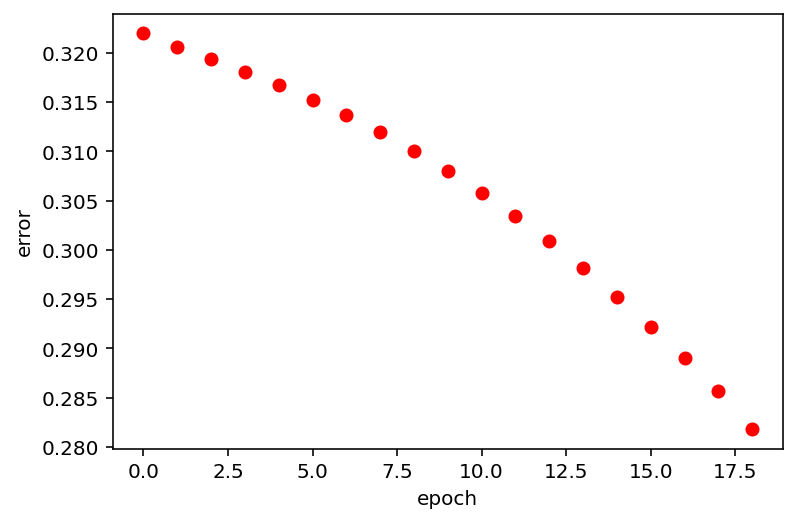

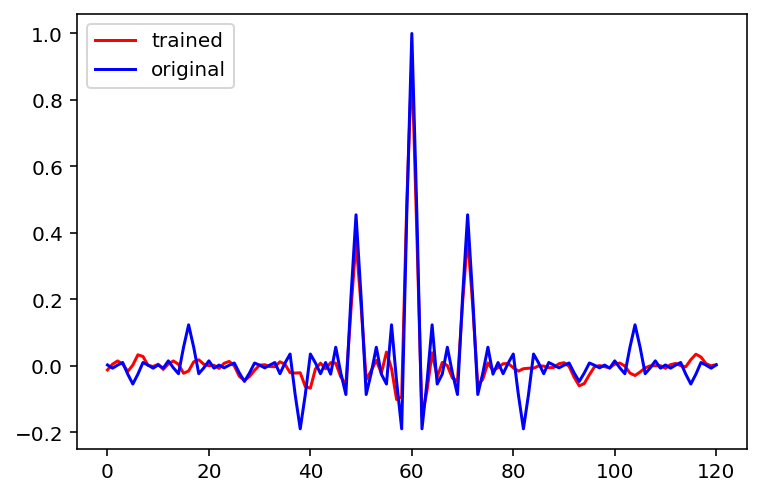

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
current error:  0.2755183682690868
current error:  0.2648121266646517
current error:  0.2492502314327335
current error:  0.24715063852056907
current error:  0.23461871094424933
current error:  0.285814517465651
current error:  0.2908273984021317
current error:  0.29417112292179437
current error:  0.34721248707064695
current

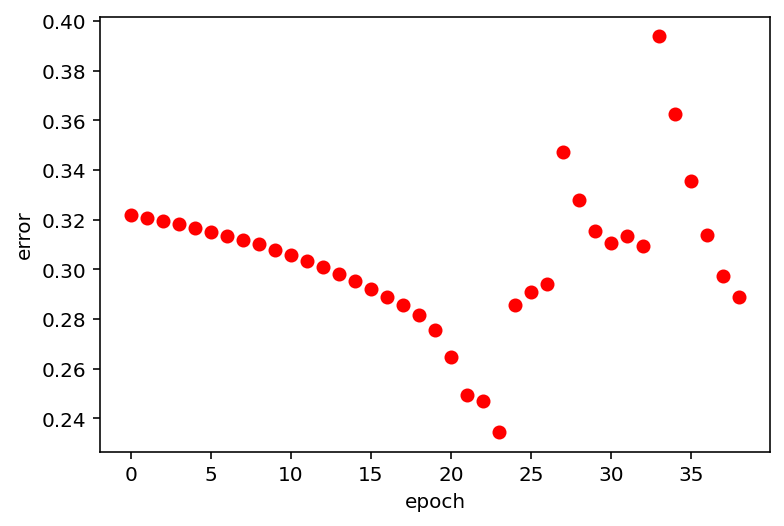

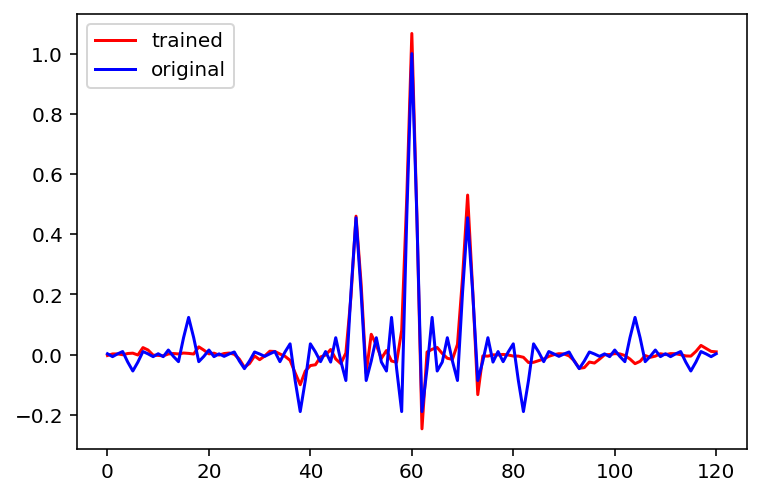

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
current error:  0.2755183682690868
current error:  0.2648121266646517
current error:  0.2492502314327335
current error:  0.24715063852056907
current error:  0.23461871094424933
current error:  0.285814517465651
current error:  0.2908273984021317
current error:  0.29417112292179437
current error:  0.34721248707064695
current

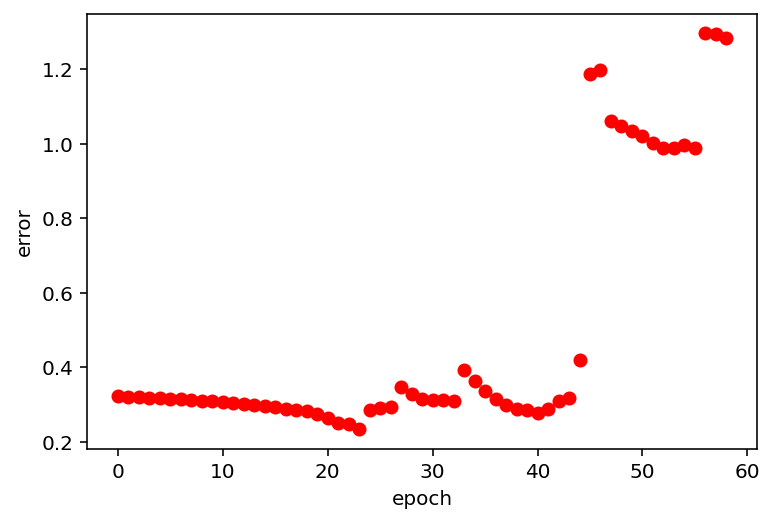

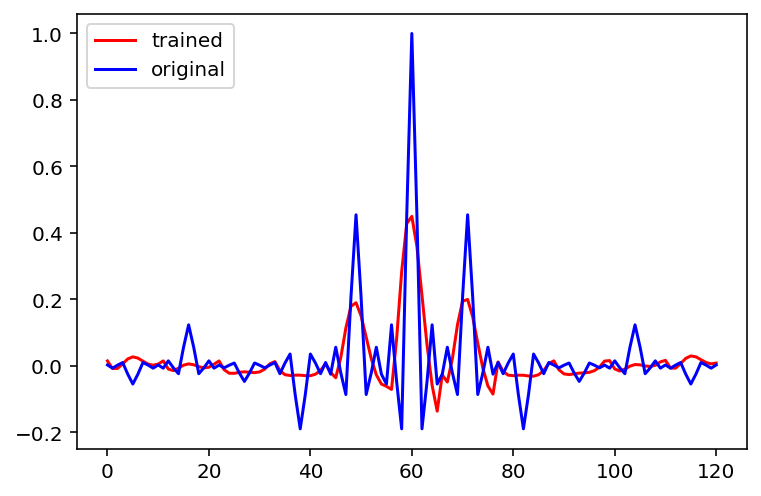

In [64]:
import anfis
from anfis.membership import membershipfunction, mfDerivs
import numpy
from anfis.anfis import ANFIS

# Load a very small dataset with two variables as features and one target

ts = numpy.loadtxt("/content/anfis/trainingSet.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

# Instantiate membership function, each one represents the behavior of one neuron
# In this case we use only gaussian membership function, but it could be triangular,
# bell, trapezoid or sigmoid membership functions as well.

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],
       ['gaussmf',{'mean':-1.,'sigma':2.}],
       ['gaussmf',{'mean':-4.,'sigma':10.}],
       ['gaussmf',{'mean':-7.,'sigma':7.}]],
      
       [['gaussmf',{'mean':1.,'sigma':2.}],
        ['gaussmf',{'mean':2.,'sigma':3.}],
        ['gaussmf',{'mean':-2.,'sigma':10.}],
        ['gaussmf',{'mean':-10.5,'sigma':5.}]]]

epochs = [20, 40, 60]

for i, epoch in enumerate(epochs):
  mfc = membershipfunction.MemFuncs(mf)
  anf = ANFIS(X, Y, mfc)
  anf.trainHybridJangOffLine(epochs=epoch)
  print(round(anf.consequents[-1][0],6))
  print(round(anf.consequents[-2][0],6))
  print(round(anf.fittedValues[9][0],6))

  if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
    print('test is good')
    print('--------------------------------------------')
  anf.plotErrors()
  anf.plotResults()

**Commentaries**

Similarly to neural networks, hyperparameters optimization matters for this kind of problem.
The error reaches a minima at the 23th epoch and then it starts increasing again, likely due to overtrained especially on a small dataset with few features. 
It could be interesting to used this network on a massive datasets of historical prices of stock market and compare the results with the predictions of a LSTM. 

Moreover, other fuzzy-neurons types should me tested with
different membership function, like bells, trapezoidals,
sigmoids or traingular membership functions. 

Quick and efficient hyperparameters optimization is a subdomain of deep-learning in itself. As a consequence,
various Neural Architecture Search (NAS) architectures, aiming to automate the design of neural networks have been proposed and frameworks are available, like nni, designed by microsoft which proposes a lot of NAS algorithms that can be tried on neural nets based on keras, tensorflow or pytorch. https://github.com/microsoft/nni 

In addition, IEEE is dedicating a special issue on 
*Evolutionnary Neural Architecture Search and Applications*. https://cis.ieee.org/images/files/Documents/call-for-papers/cim/CIM_SI_ENAS_CFP.pdf 
 
Papers have already been submitted and are being reviewed, so it seems to us that it is important to being keep posted on those advanced as it really helps saving times on parameters optimoization. 

However these kinds of frameworks and researches does not seem to exist or being adapted to fuzzy neural networks, so research and designing pratical libraries on those subjects should be done.

